In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Police_data.csv")

# Count how many times each neighborhood appears
offense_counts = df['OFFENSES'].value_counts()

# Print the total number of unique neighborhoods
print("Number of different offenses:", df['OFFENSES'].nunique())
print("\nList of neighborhoods and how many times each is listed:\n")

# Display each neighborhood and its count
for offense, count in offense_counts.items():
    print(f"{offense}: {count}")


Number of different offenses: 183

List of neighborhoods and how many times each is listed:

5505 Public Drunkenness: 3162
2709(a)(1) Harassment by Physical Contact, or Attempts or Threats: 1561
5503(a)(1) DISORDERLY CONDUCT - ENGAGE IN FIGHTING: 1340
627.02(b)(i) Possessing a small amount of marijuana: 1329
601.16(b)(1)(a) Any Person who urinates or defecates in, on, or about any public place: 1319
5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF: 700
5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE: 685
601.08(a) Alcohol or Liquor Consumption on Streets or Sidewalks: 558
3304(a)(5) CRIMINAL MISCHIEF - Intentionally Damages Real Or Personal Property Of Another: 515
6308(a) Underage Purchase, Consume, Possessed or Transport Liquor: 427
601.08 (a) Open Container Law: 371
2709(a)(3) Harassment No Legitimate Purpose: 368
5503(a)(3) DISORDERLY CONDUCT - OBSCENE LANG/GEST: 295
5507(a) Obstructing highway, railroad or public passage: 282
3503(b.1) Criminal Trespass - Simple Trespasser: 

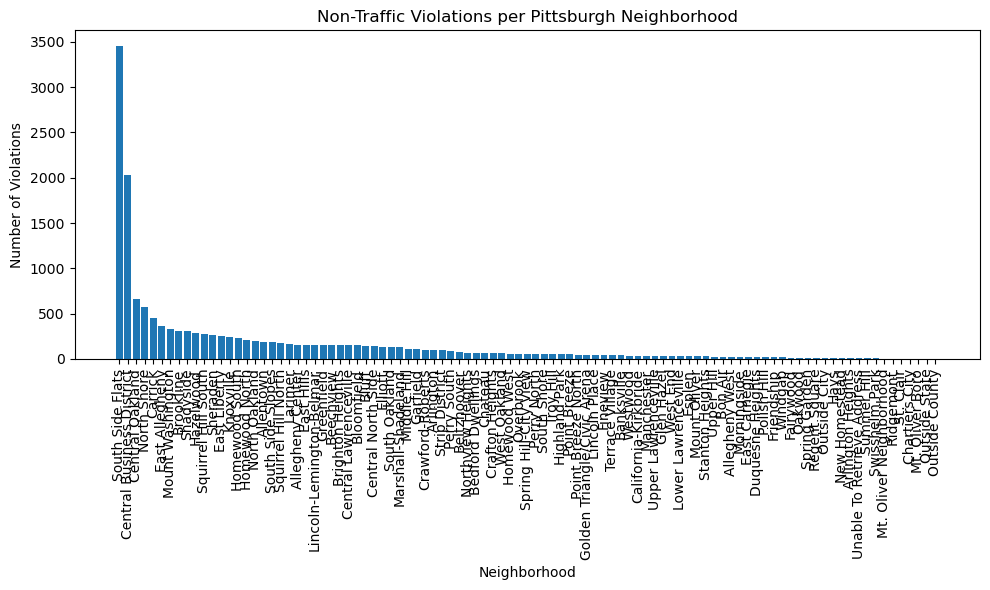

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded dataset
df = pd.read_csv("Police_data.csv")

# Count occurrences per neighborhood
neighborhood_counts = df['NEIGHBORHOOD'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(neighborhood_counts.index, neighborhood_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Violations")
plt.title("Non-Traffic Violations per Pittsburgh Neighborhood")
plt.tight_layout()
plt.show()


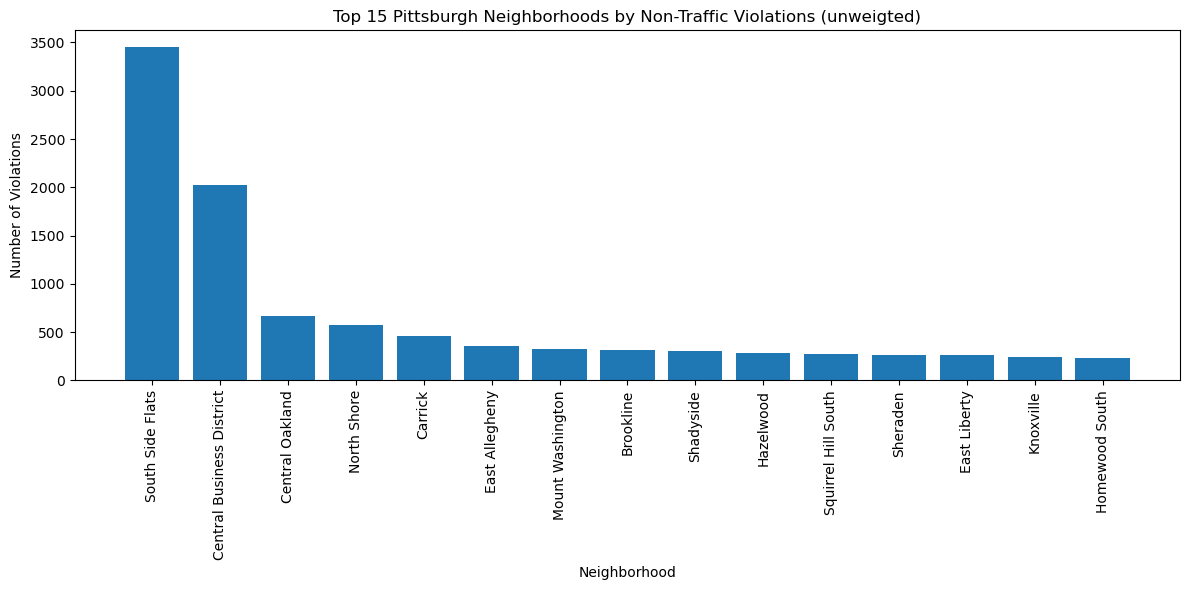

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded dataset
df = pd.read_csv("Police_data.csv")

# Count occurrences per neighborhood
neighborhood_counts = df['NEIGHBORHOOD'].value_counts()

# Select the top 25
top15 = neighborhood_counts.head(15)

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(top15.index, top15.values)
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Violations")
plt.title("Top 15 Pittsburgh Neighborhoods by Non-Traffic Violations (unweigted)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded dataset
df = pd.read_csv("Police_data.csv")

# Count occurrences per neighborhood
neighborhood_counts = df['NEIGHBORHOOD'].value_counts()

# Select the top 25
top15 = neighborhood_counts.head(15)

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(top15.index, top15.values)
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Violations")
plt.title("Top 15 Pittsburgh Neighborhoods by Non-Traffic Violations (weigted)")
plt.tight_layout()
plt.show()


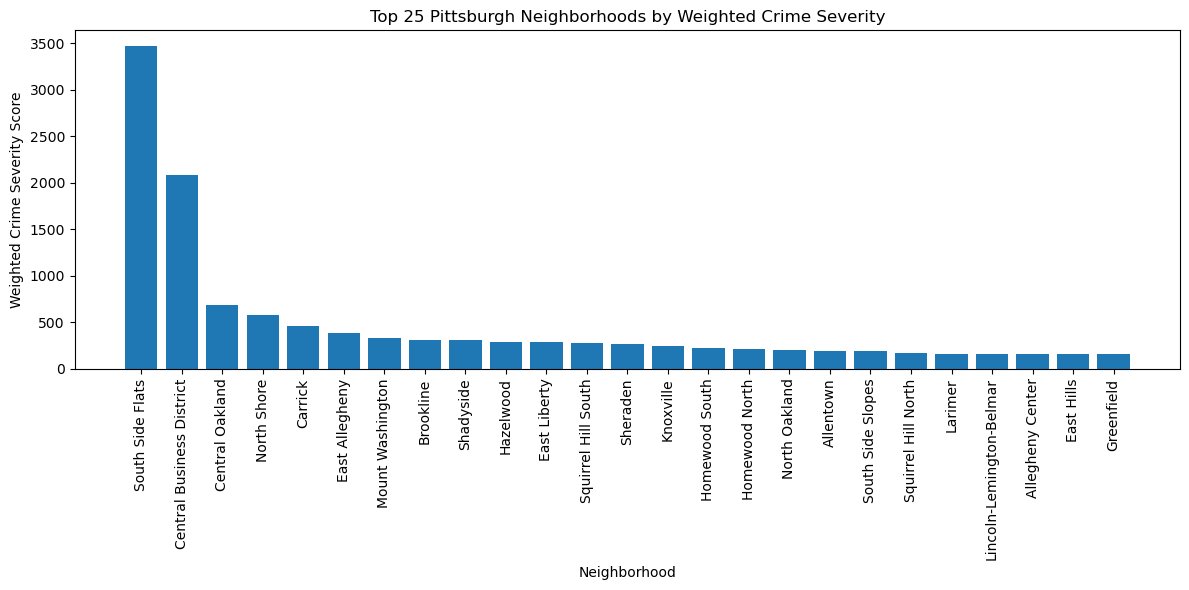

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Police_data.csv")

# Weight system based on severity (Option A)
def get_weight(offense):
    offense = str(offense).upper()

    if "HOMICIDE" in offense:
        return 5
    elif "AGGRAVATED ASSAULT" in offense:
        return 4
    elif "ROBBERY" in offense:
        return 4
    elif "BURGLARY" in offense:
        return 3
    elif "THEFT" in offense:
        return 2
    elif "VANDALISM" in offense:
        return 2
    elif "DISORDERLY" in offense:
        return 1
    elif "LIQUOR" in offense:
        return 1
    else:
        return 1

# Apply weights
df["WEIGHT"] = df["OFFENSES"].apply(get_weight)

# Compute weighted score per neighborhood
weighted_scores = df.groupby("NEIGHBORHOOD")["WEIGHT"].sum()

# Select the top 25
top25 = weighted_scores.sort_values(ascending=False).head(25)

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(top25.index, top25.values)
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Weighted Crime Severity Score")
plt.title("Top 25 Pittsburgh Neighborhoods by Weighted Crime Severity")
plt.tight_layout()
plt.show()
